# Single Regression and Multivariable Regression in SciKit-Learn vs Keras
In this notebook, we compare single and multiple linear regression models in Scikit Learn and Keras.  It seems a little odd to perform a linear regression with Keras, but the purpose of this script is to gain an understanding of the design of a neural network.  Linear regression models are generally easy to create and to make in libraries like sklearn, which makes it easy to verify how correct the answer from the Keras NN is.

## 1. Single Variable Regression
This sections compares the single variable regression models of Keras and Scikit-Learn. 

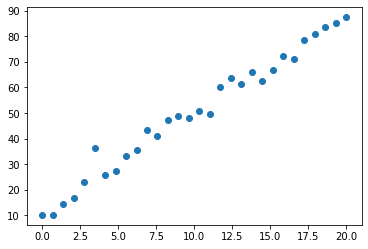

In [1]:
# Generate synthetic dataset
import numpy as np
import matplotlib.pyplot as plt
n_samples = 30
train_x = np.linspace(0,20,n_samples)
train_y = 3.7 * train_x + 14 + 4 * np.random.randn(n_samples)
plt.plot(train_x, train_y,'o')

### Scikit-Learn Model


In [2]:
# Create regression model with Scikit-learn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess the data for LinearRegression Model
sklearn_input_value = train_x.reshape(-1,1)
sklearn_output_value = train_y.reshape(-1,1)

# Create and fit the model
linreg = linear_model.LinearRegression()
linreg.fit(sklearn_input_value, sklearn_output_value)

# Print m and b to terminal
print("y-intercept: b = ",linreg.intercept_)
print("slope: m = ",linreg.coef_)

y-intercept: b =  [12.13705991]
slope: m =  [[3.79721056]]


Assessing the model with Root Mean Square Error:
$$RMSE = \sqrt{\frac{1}{N}\sum{[f(x_i)-x_i]^2}}$$ 

In [3]:
# Hand-calculated RMSE
predictions = linreg.predict(sklearn_input_value)
squareErrorSum = np.sum((predictions - sklearn_output_value)**2)
meanSquareErrorSum = squareErrorSum/n_samples
RMSE = np.sqrt(meanSquareErrorSum)
print("Hand-Calculated Score (RMSE): ",RMSE)

# RMSE from sklearn
score = np.sqrt(mean_squared_error(predictions,sklearn_output_value))
print("Sklearn Score (RMSE): {}".format(score))

Hand-Calculated Score (RMSE):  3.308046215204908
Sklearn Score (RMSE): 3.308046215204908


### Keras Model
A single linear regression neural network can be thought of as a simple 1 layer network with one input node and one output node:

<img src="https://drive.google.com/uc?id=1oYQHPdAGZ05vSeVeBwOb5Ee-nIM66XIl" width="400" height="200" />

For this model, adam is uses since it uses stochastic gradient descent for its optimization.



In [4]:
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# build the model
# The Sequntial model is used for cases where each LAYER has one input and
# one output.  It is used for most standard NNs, where there is NO branching
model = Sequential()
# .add(Dense()) method inputs
# First argument is 
# input_dim is number of input layer nodes
# Make sure to set the activation function to linear for linear regression
model.add(Dense(1,input_dim = 1, activation = 'linear'))

# Compile the model and summarize
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train the model
epochs = 20000
hist = model.fit(train_x,train_y, verbose = 0,epochs = epochs)

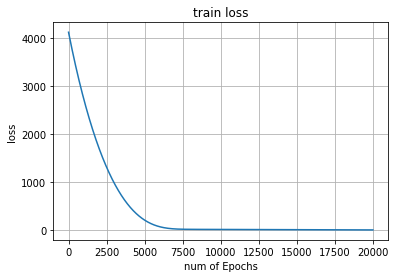

In [6]:
# Visualize the loss
train_loss = hist.history['loss']
xc = range(epochs)
plt.plot(xc,train_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train loss')
plt.grid(True)
plt.style.use(['ggplot'])

In [7]:
# Print the weights and biases of all the neurons in the Neural Network
# Does not post the values of the output layer
# Layer number = 0 is the input layer
for layerNum, layer in enumerate(model.layers):
  print("Layer Number = ", layerNum)
  print("Weight Values = ", layer.get_weights()[0])
  print("Bias Values = ", layer.get_weights()[1])

Layer Number =  0
Weight Values =  [[3.8003852]]
Bias Values =  [12.094119]


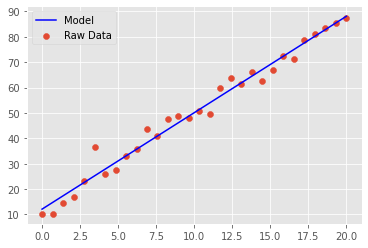

In [8]:
pred = model.predict(train_x)
plt.plot(train_x, pred, 'b')
plt.scatter(train_x, train_y)
plt.legend(("Model","Raw Data"))

In [9]:
# Do a quick sample prediction.
# This isn't too interesting, because it is just plugging into y = mx+b
test_x = [15]
pred = model.predict(test_x)
print(pred)

[[69.0999]]


## 2. Multivariate Regression
We are aiming to predict the price based on the number of bedrooms and the living square foot space.  This equation can be modeled as follows:
$$Y = m_1X_1 + m_2X_2 + b$$ 
Where $X_1$ = number of bedrooms, $X_2$ = sqft_living, $m_n$ is the corresbonding weight or slope, and b is the y-intercept.

In [10]:
# Allows you to upload file from local computer
from google.colab import files  
uploaded = files.upload()

Saving 00 kc_house_data.csv to 00 kc_house_data.csv


In [11]:
# Extract pertinant data from the csv
import io
import pandas as pd

data = pd.read_csv(io.BytesIO(uploaded['00 kc_house_data.csv'])) 
print("Raw Data: ")
print(data.head())
features = data[['bedrooms','sqft_living']]
print('#########')
print("Features: ")
print(type(features))
print(features[0:5])
print('#########')
print("Label: ")
label = (data['price'])
label[0:5]

Raw Data: 
           id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]
#########
Features: 
<class 'pandas.core.frame.DataFrame'>
   bedrooms  sqft_living
0         3         1180
1         3         2570
2         2          770
3         4         1960
4         3         1680
#########
Label: 


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

Feature scaling method - Rescaling (min-max normalization):
$$x' = {x-min(x)\over max(x)-min(x)} $$

This normalization method scales all values between 0 and 1. You can hard code this in python as:
```python
featuresMin = features.min(axis=0)
featuresMax = features.max(axis=0)
featuresScale2 = (features - featuresMin)/(featuresMax - featuresMin)
```

Scikit-Learn's preprocessing library does it the way shown above, but it is easier to use the preprocessing library and minmax_scale method instead of using the equation.

In [12]:
from sklearn import preprocessing

# Scales the values between 0 and 1
scaled_features = preprocessing.minmax_scale(features)
scaled_label = preprocessing.minmax_scale(label)

### Multivariate regression with Scikit-Learn

In [13]:
from sklearn import linear_model

multi_regression_model = linear_model.LinearRegression()
multi_regression_model.fit(scaled_features, scaled_label)

print (multi_regression_model.intercept_)
print (multi_regression_model.coef_)

0.012526488915412387
[-0.24697745  0.54555018]


### Multivariate regression with Keras
A two variable (predictor) linear regression neural network can be thought of as a simple 1 layer network with two input nodes and one output node:

<img src="https://drive.google.com/uc?id=1AtKNIpJ0z9-0Y7f-ah0c45VXP-qIT7Ll" width="400" height="200" />


In [14]:
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Activation

mr_NN_model = Sequential()
# Only difference for multivariate regression is number of input dimension
# Depending on the number of independent variables, you change the value of the
# input_dim parameter
mr_NN_model.add(Dense(1,input_dim = 2, activation = 'linear'))

# Compile the model and summarize
mr_NN_model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])
mr_NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [15]:
mr_epochs = 20
mr_hist = mr_NN_model.fit(scaled_features,scaled_label, verbose = 0,epochs =mr_epochs)

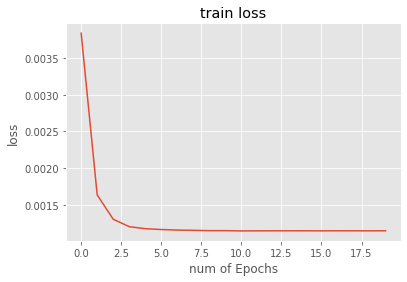

In [16]:
# Visualize the loss
train_loss = mr_hist.history['loss']
xc = range(mr_epochs)
plt.plot(xc,train_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train loss')
plt.grid(True)
plt.style.use(['ggplot'])


In [17]:
for layerNum, layer in enumerate(mr_NN_model.layers):
  print("Layer Number = ", layerNum)
  print("Weight Values = ", layer.get_weights()[0])
  print("Bias Values = ", layer.get_weights()[1])

Layer Number =  0
Weight Values =  [[-0.25005305]
 [ 0.54242593]]
Bias Values =  [0.01385049]
